In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9697.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_10087.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9618.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9614.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9862.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9838.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9851.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_9691.jpg
/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/

In [2]:

import os
import numpy as np
from PIL import Image

def load_images(root_folder, folder_names, target_size=(128, 128)):
    # Lists to store image data (X) and labels (y)
    X = []  # Image data
    y = []  # Corresponding labels

    label_counter = 0
    for folder_name in folder_names:
        # Construct the path for the current folder
        folder_path = os.path.join(root_folder, folder_name)

        # Check if the folder path exists and is a directory
        if os.path.isdir(folder_path):
            # For each image in the folder
            for filename in sorted(os.listdir(folder_path)):
                # Construct the full path of the image file
                img_path = os.path.join(folder_path, filename)

                # Open the image using PIL
                with Image.open(img_path) as img:
                    # Resize the image to the target size
                    img_resized = img.resize(target_size)

                    # Convert the image to a NumPy array
                    img_array = np.array(img_resized)

                    # Append the image array to the X list
                    X.append(img_array)
                    # Append the corresponding label to the y list
                    y.append(label_counter)

            # Increment the label counter for the next class
            label_counter += 1

    # Convert the lists of images and labels to NumPy arrays and return
    return np.array(X), np.array(y)


In [3]:
root_folder = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'
class_names = ['benign','malignant']
X_train, y_train = load_images(root_folder,class_names)
root_folder2 ='/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'
X_test, y_test = load_images(root_folder2,class_names)

In [4]:
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'benign': 0, 'malignant': 1}

In [5]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (9605, 128, 128, 3)
X_test Shape:  (1000, 128, 128, 3)
y_train Shape:  (9605,)
y_test Shape:  (1000,)


In [6]:
#normalize
X_train=X_train/255.0
X_test=X_test/255.0

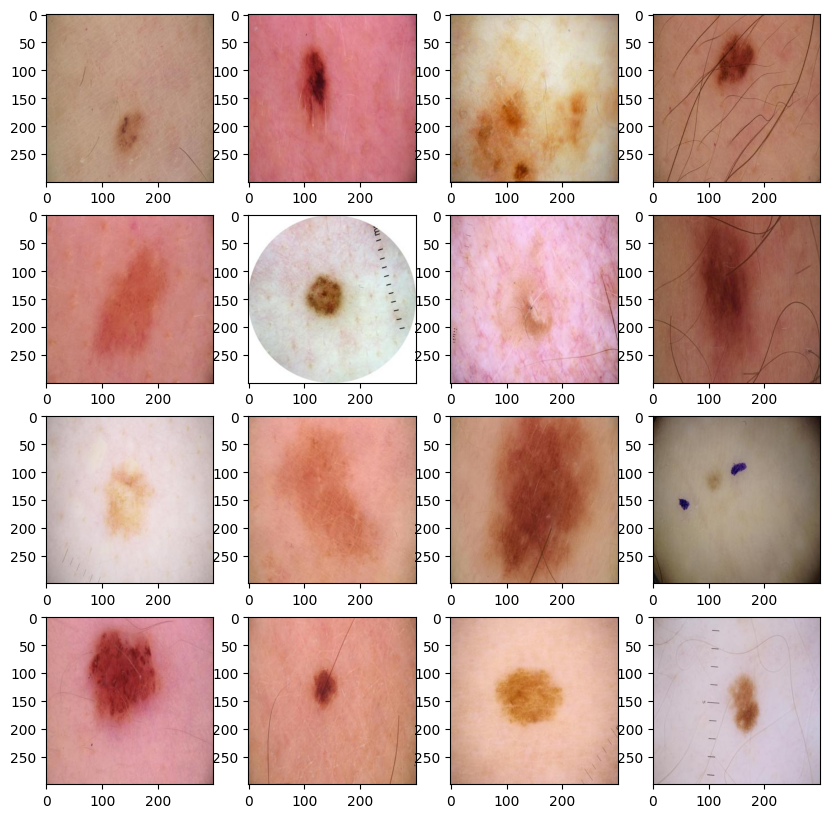

In [7]:
import matplotlib.pyplot as plt

def visualize_images(folder_path):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4

    # Get a list of image file names in the folder
    images = os.listdir(folder_path)

    # Visualize the images
    for i in range(1, columns * rows + 1):
        image_path = os.path.join(folder_path, images[i])
        img = plt.imread(image_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()
    
visualize_images('/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/benign')


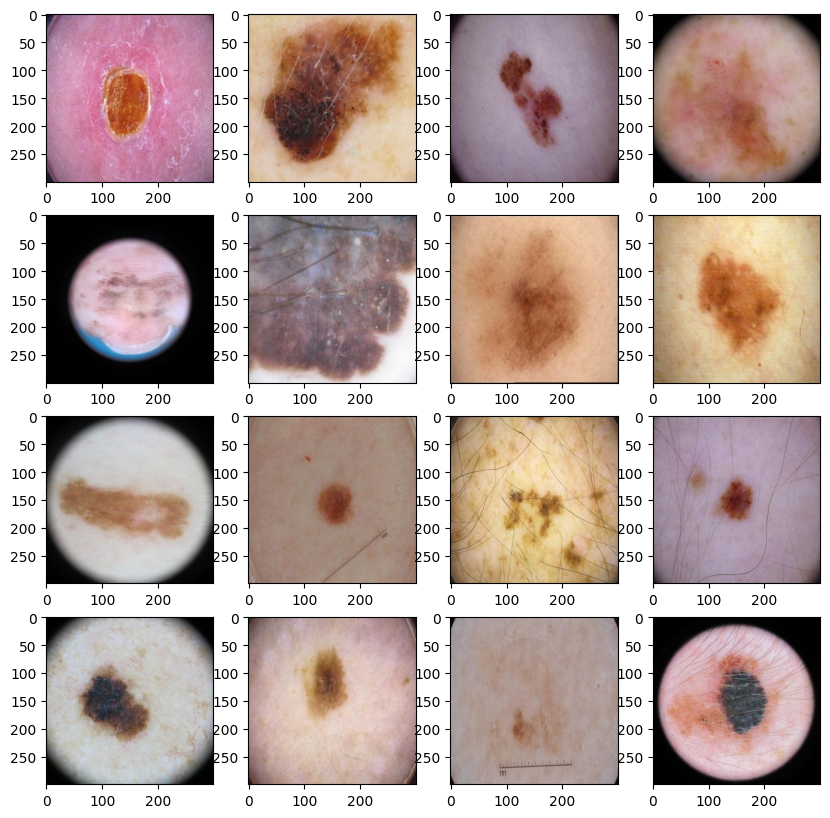

In [8]:
import matplotlib.pyplot as plt

def visualize_images(folder_path):
    fig = plt.figure(figsize=(10, 10))
    columns = 4
    rows = 4

    # Get a list of image file names in the folder
    images = os.listdir(folder_path)

    # Visualize the images
    for i in range(1, columns * rows + 1):
        image_path = os.path.join(folder_path, images[i])
        img = plt.imread(image_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)

    plt.show()
    
visualize_images('/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train/malignant')


In [9]:
#check missing values
import numpy as np
missing_values_X_train = np.isnan(X_train).sum()
missing_values_y_train = np.isnan(y_train).sum()
print("Missing values in X_train:", missing_values_X_train)
print("Missing values in y_train:", missing_values_y_train)

Missing values in X_train: 0
Missing values in y_train: 0


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    # Your data augmentation parameters
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
def augment_dataset(dataset):
    augmented_data = []
    for img in dataset:
        img = np.expand_dims(img, axis=0)  # Expanding dimensions for batch size
        seed = np.random.randint(0, 1000)  # Random seed for augmentation
        for batch in datagen.flow(img, batch_size=1, seed=seed):  # Generate one augmented image
            augmented_data.append(np.squeeze(batch))  # Remove batch dimension
            break  # Stop after one image
    return np.array(augmented_data)

# Apply augmentation once
X_train_augmented = augment_dataset(X_train)
y_train_augmented = np.repeat(y_train, 1, axis=0) 

In [12]:
import numpy as np
from sklearn.utils import shuffle

# Combine original data with augmented data
X_train_combined = np.concatenate((X_train, X_train_augmented))
y_train_combined = np.concatenate((y_train, y_train_augmented))

# Shuffle the combined data, ensuring both arrays are shuffled identically
X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)


In [13]:
# Display shapes of augmented and combined datasets
print("Original Training Data Shape:", X_train.shape)
print("Augmented Training Dataset Shape:", X_train_augmented.shape)
print("Combined Training Dataset shape:",X_train_combined.shape)
print("---------------------------------------------------------------------------------------")
print("Original Training Labels Shape:", y_train.shape)
print("Augmented Training Labels Shape:", y_train_augmented.shape)
print("Combined Training labels shape:", y_train_combined.shape)
print("---------------------------------------------------------------------------------------")


Original Training Data Shape: (9605, 128, 128, 3)
Augmented Training Dataset Shape: (9605, 128, 128, 3)
Combined Training Dataset shape: (19210, 128, 128, 3)
---------------------------------------------------------------------------------------
Original Training Labels Shape: (9605,)
Augmented Training Labels Shape: (9605,)
Combined Training labels shape: (19210,)
---------------------------------------------------------------------------------------


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNet
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Load MobileNet as the base model (excluding the top layer)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)

# Add custom layers for classification
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(1, activation='sigmoid')) 

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2097280   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [15]:
import tensorflow as tf
metrics = [
        'accuracy',
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()]

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-2
    if epoch > 5:
        lr *= 1e-1
    if epoch > 10:
        lr *= 1e-1
    return lr

# Use the LearningRateScheduler callback during model training
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    LearningRateScheduler(lr_schedule)
]

history = model.fit(X_train_combined,y_train_combined.astype('float32'),validation_split = 0.3,epochs = 100, batch_size = 100, callbacks = [callbacks])

Epoch 1/100
135/135 [==============================] - 27s 93ms/step - loss: 3.3989 - accuracy: 0.7738 - recall: 0.7206 - precision: 0.7903 - false_negatives: 1806.0000 - false_positives: 1236.0000 - true_negatives: 5746.0000 - true_positives: 4659.0000 - f1_score: 0.6483 - val_loss: 0.3586 - val_accuracy: 0.8711 - val_recall: 0.8947 - val_precision: 0.8440 - val_false_negatives: 289.0000 - val_false_positives: 454.0000 - val_true_negatives: 2564.0000 - val_true_positives: 2456.0000 - val_f1_score: 0.6453 - lr: 0.0100
Epoch 2/100
135/135 [==============================] - 8s 57ms/step - loss: 0.3638 - accuracy: 0.8589 - recall: 0.8419 - precision: 0.8614 - false_negatives: 1022.0000 - false_positives: 876.0000 - true_negatives: 6106.0000 - true_positives: 5443.0000 - f1_score: 0.6494 - val_loss: 0.2989 - val_accuracy: 0.8905 - val_recall: 0.8503 - val_precision: 0.9139 - val_false_negatives: 411.0000 - val_false_positives: 220.0000 - val_true_negatives: 2798.0000 - val_true_positives: 

In [18]:
model.evaluate(X_test, y_test.astype('float32'))


32/32 [==============================] - 1s 22ms/step - loss: 0.2794 - accuracy: 0.9020 - recall: 0.8640 - precision: 0.9351 - false_negatives: 68.0000 - false_positives: 30.0000 - true_negatives: 470.0000 - true_positives: 432.0000 - f1_score: 0.6667   


[0.27941054105758667,
 0.9020000100135803,
 0.8640000224113464,
 0.9350649118423462,
 68.0,
 30.0,
 470.0,
 432.0,
 array([0.6666667], dtype=float32)]

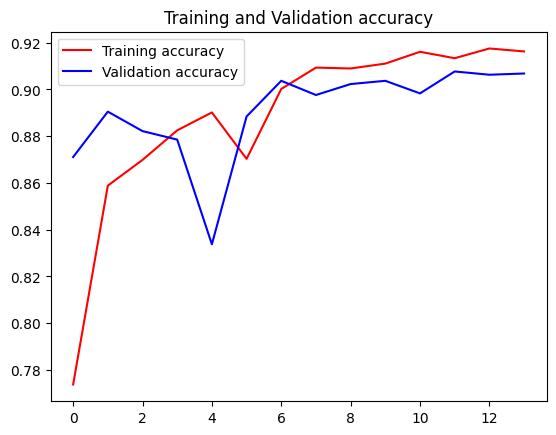

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)  # Add a legend
plt.show()  # Display the plot



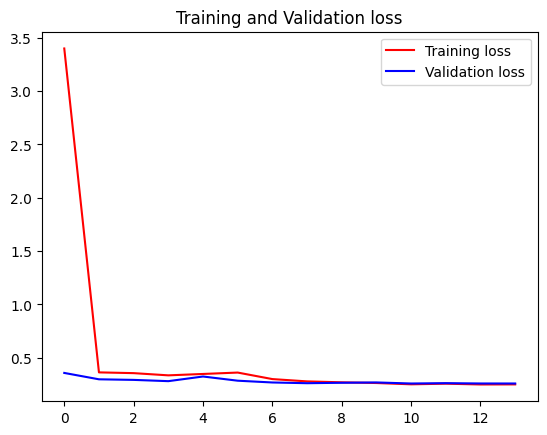

In [29]:
import matplotlib.pyplot as plt
val_loss = history.history['val_loss']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)  # Add a legend
plt.show()  # Display the plot

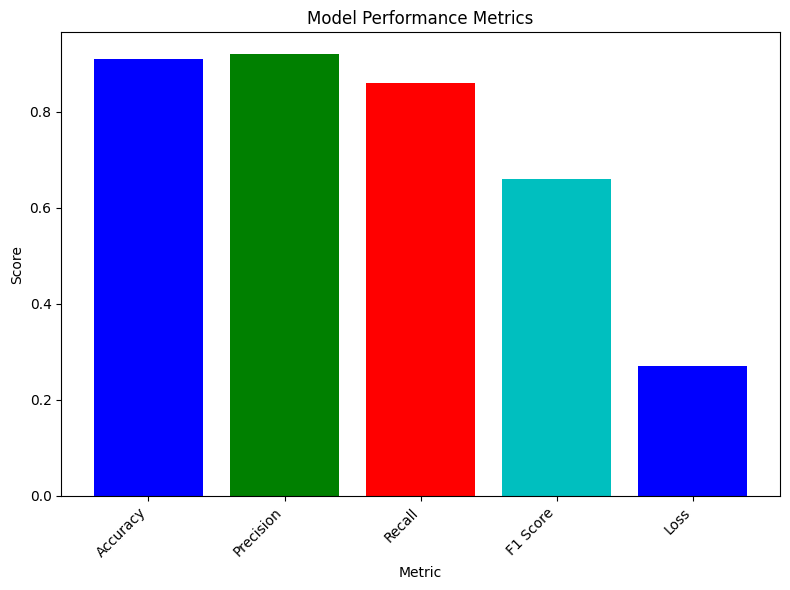

In [35]:
import matplotlib.pyplot as plt

# Define the model metrics
model_metrics = {
    "Accuracy": 0.91,
    "Precision": 0.92,
    "Recall": 0.86,
    "F1 Score": 0.66,
    "Loss" : 0.25
}

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_metrics.keys(), model_metrics.values(), color=['b', 'g', 'r', 'c'])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()